In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 5.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima  as pm
import os

In [3]:
import pandas as pd
df = pd.read_excel("data_col2.xlsx")

In [4]:
df.rename(columns = {"GDP, real, LCU":"actual_gdp"}, inplace = True)
df.head()

,year,quarter,Consumer price index,"Consumption, government, real, LCU","Consumption, private, real, LCU","Current account of balance of payments, LCU","Employment, total (miles)","Exchange rate, period average, per Euro","Exchange rate, period average","Exports, goods & services, real, LCU",...,"Investment, total fixed investment, real, LCU","Reserves, foreign exchange, US$",Share price index,"Stockbuilding, real, LCU",Unemployment rate,gdpgq,gdpg_a,gdpg_a_e_2q,gdpg_a_e_3q,GDP deflator1990
0,1981,4,1.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5458.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,1,1.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5436.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,2,1.273333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5196.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1982,3,1.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4942.433333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1982,4,1.396667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4776.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datos = df[['year','quarter','actual_gdp']]  
datos

,year,quarter,actual_gdp
0,1981,4,NaN
1,1982,1,NaN
2,1982,2,NaN
3,1982,3,NaN
4,1982,4,NaN
...,...,...,...
160,2021,4,253660.549022
161,2022,1,227487.286338
162,2022,2,NaN
163,2022,3,NaN


In [6]:
datos['time']=pd.to_datetime(datos['year'].astype(str) + 'Q' + datos['quarter'].astype(str))
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,quarter,actual_gdp,time
0,1981,4,NaN,1981-10-01
1,1982,1,NaN,1982-01-01
2,1982,2,NaN,1982-04-01
3,1982,3,NaN,1982-07-01
4,1982,4,NaN,1982-10-01
...,...,...,...,...
160,2021,4,253660.549022,2021-10-01
161,2022,1,227487.286338,2022-01-01
162,2022,2,NaN,2022-04-01
163,2022,3,NaN,2022-07-01


In [7]:
# Indexar la serie por la fecha
SerieTiempo = datos.set_index('time')
SerieTiempo

,year,quarter,actual_gdp
time,,,
1981-10-01,1981,4,NaN
1982-01-01,1982,1,NaN
1982-04-01,1982,2,NaN
1982-07-01,1982,3,NaN
1982-10-01,1982,4,NaN
...,...,...,...
2021-10-01,2021,4,253660.549022
2022-01-01,2022,1,227487.286338
2022-04-01,2022,2,NaN


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [9]:
# Vamos a crear otra columna: log del PIB
# El logaritmo disminuye la varianza de la serie, lo que facilita la estimación del modelo
SerieTiempo['LPIB'] = np.log(SerieTiempo['actual_gdp'])
SerieTiempo

,year,quarter,actual_gdp,LPIB
time,,,,
1981-10-01,1981,4,NaN,NaN
1982-01-01,1982,1,NaN,NaN
1982-04-01,1982,2,NaN,NaN
1982-07-01,1982,3,NaN,NaN
1982-10-01,1982,4,NaN,NaN
...,...,...,...,...
2021-10-01,2021,4,253660.549022,12.443752
2022-01-01,2022,1,227487.286338,12.334850
2022-04-01,2022,2,NaN,NaN


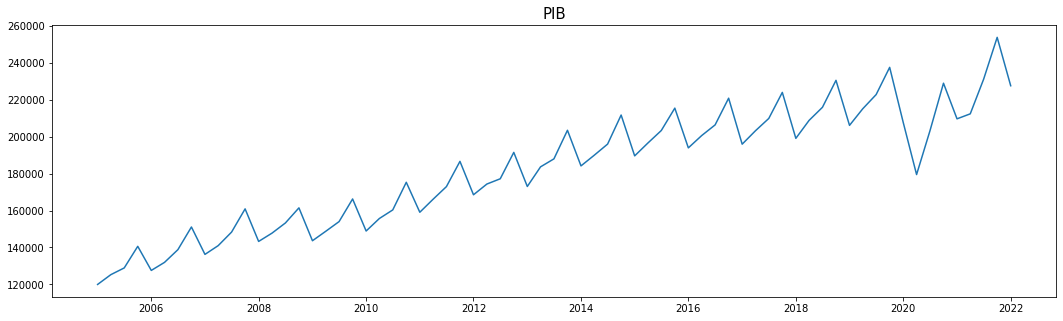

In [10]:
# Gráfico de la serie PIB
plt.figure(figsize=(18,5))
plt.title('PIB', fontsize = 15)
plt.plot(SerieTiempo['actual_gdp'])
plt.show()

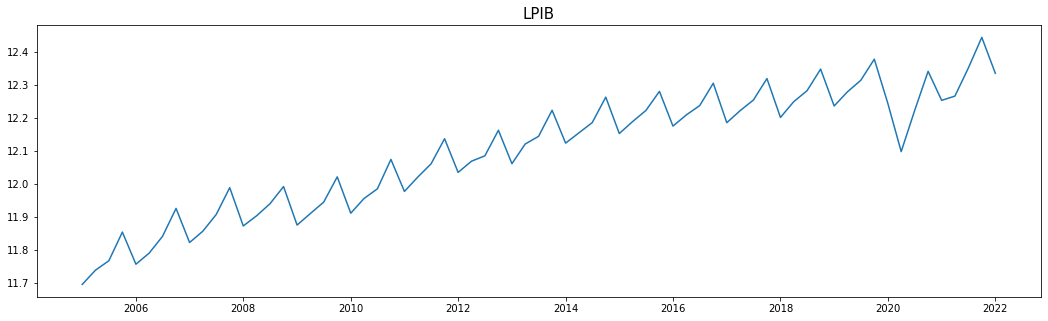

In [11]:
# Gráfico de la serie logaritmica del PIB
plt.figure(figsize=(18,5))
plt.title('LPIB', fontsize = 15)
plt.plot(SerieTiempo['LPIB'])
plt.show()

In [12]:
SerieTiempo = SerieTiempo.dropna()

In [13]:
SerieTiempo

,year,quarter,actual_gdp,LPIB
time,,,,
2005-01-01,2005,1,120001.400283,11.695259
2005-04-01,2005,2,125296.345675,11.738437
2005-07-01,2005,3,128934.308843,11.767058
2005-10-01,2005,4,140620.945199,11.853823
2006-01-01,2006,1,127587.214775,11.756555
...,...,...,...,...
2021-01-01,2021,1,209585.806814,12.252889
2021-04-01,2021,2,212288.074065,12.265699
2021-07-01,2021,3,231036.478968,12.350331


In [14]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(SerieTiempo['actual_gdp'])
print(test_result)
#Ho: No - estacionariedad
#H1: Estacionariedad

(-1.652039689367089, 0.45597688438894435, 8, 60, {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}, 1158.1723812889359)


In [15]:
def adfuller_test(actual_gdp):
    result=adfuller(actual_gdp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Fuerte evidencia contra la hipetesis nula (Ho), se rechaza la hipotesis nula. La serie es estacionaria.")
    else:
        print("No hay evidencia estadistica para rechazar la hipotesis nula. La serie es no - estacionaria.")

adfuller_test(SerieTiempo['LPIB'])

ADF Test Statistic : -2.036416140788219
p-value : 0.2708375903898005
#Lags Used : 8
Number of Observations : 60
No hay evidencia estadistica para rechazar la hipotesis nula. La serie es no - estacionaria.


In [16]:
model = pm.auto_arima(SerieTiempo.LPIB, start_p=1, start_q=1,
                      test='adf',       
                      max_p=3, max_q=3,
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-180.508, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-154.732, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-160.427, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-182.305, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-155.680, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-180.785, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-186.649, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-202.668, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-186.173, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-252.958, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-253.796, Time=0.98 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-230.769, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-170.295, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-238.891, Time=0.78 sec

Best model:  ARIMA(3,1,1)(0,0,0)

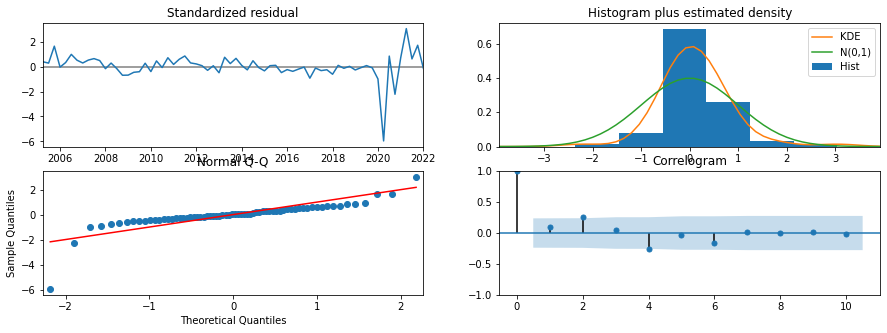

In [17]:
# Diagnostico de la serie
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(15,5))
plt.show()

In [18]:
# ARIMA CON EL ORDEN ÓPTIMO DETERMINADO PREVIAMENTE DADA LA MINIMIZACIÓN DEL AIC
ModeloARIMA012=sm.tsa.ARIMA(SerieTiempo['LPIB'], order = (3,1,1), freq='QS')
ResultadosARIMA012 = ModeloARIMA012.fit()
print(ResultadosARIMA012.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   LPIB   No. Observations:                   69
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 124.446
Date:                Sun, 21 Aug 2022   AIC                           -238.891
Time:                        17:56:52   BIC                           -227.794
Sample:                    01-01-2005   HQIC                          -234.494
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9440      0.056    -16.715      0.000      -1.055      -0.833
ar.L2         -0.7840      0.092     -8.498      0.000      -0.965      -0.603
ar.L3         -0.8331      0.068    -12.331      0.0

In [19]:
# podemos dividir el conjunto de datos en conjuntos de train y test directamente (70-30)

X = SerieTiempo
X = X.astype('float32')

train_size = int(len(X) * 0.83)
train, test = X[0:train_size], X[train_size:]
train_size
train.shape, test.shape

((57, 4), (12, 4))

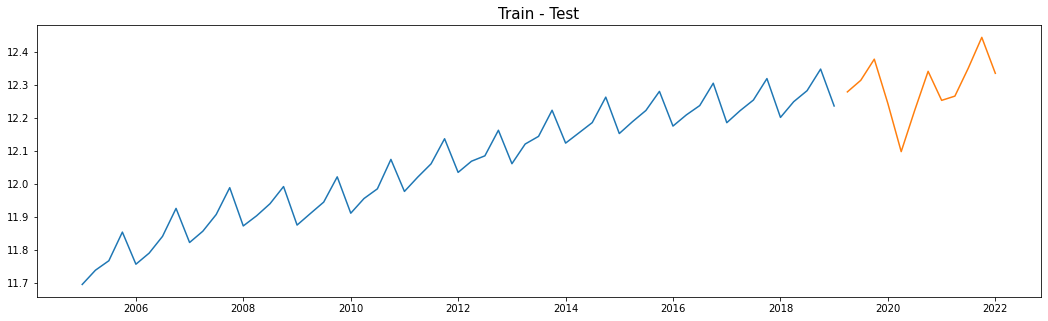

In [20]:
plt.figure(figsize=(18,5))
plt.title('Train - Test', fontsize = 15)
plt.plot(train['LPIB'], label='train')
plt.plot(test['LPIB'], label='test')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,quarter,actual_gdp,LPIB,pronosticoSARIMA
time,,,,,
2005-07-01,2005,3,128934.308843,11.767058,11.727820
2005-10-01,2005,4,140620.945199,11.853823,11.738240
2006-01-01,2006,1,127587.214775,11.756555,11.746265
2006-04-01,2006,2,131941.288576,11.790112,11.762390
2006-07-01,2006,3,138820.484187,11.840937,11.781393
...,...,...,...,...,...
2021-01-01,2021,1,209585.806814,12.252889,12.204822
2021-04-01,2021,2,212288.074065,12.265699,12.179308
2021-07-01,2021,3,231036.478968,12.350331,12.295398


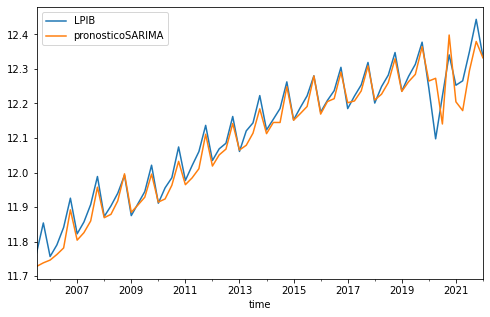

In [21]:
# RESULTADOS
TSLA1DD = SerieTiempo.iloc[2:]
TSLA1DD

TSLA1DD['pronosticoSARIMA'] = ResultadosARIMA012.predict() 

plot = TSLA1DD[['LPIB', 'pronosticoSARIMA']].plot(figsize=(8,5))

TSLA1DD